In [2]:
import sys
import os

# --- This is the fix ---
# Get the absolute path of the project's root directory
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), '..')) if '__file__' in locals() else os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the Python path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)
# ----------------------

# Now your import will work correctly
from src.data_handler import DataHandler

# Define the path to our config file (it's now relative to the project root)
config_path = '../config/strategy_config.yaml'

# Create an instance of the class
data_handler = DataHandler(config_path=config_path)

# Fetch the data
all_stock_data = data_handler.fetch_data()

# Print the head of one of the dataframes to verify
if all_stock_data:
    print("\n--- Sample of fetched data ---")
    print(all_stock_data['RELIANCE.NS'].head())

Loading 'RELIANCE.NS' from cache...
Loading 'TCS.NS' from cache...
Loading 'HDFCBANK.NS' from cache...
Loading 'INFY.NS' from cache...
Loading 'ICICIBANK.NS' from cache...

--- Sample of fetched data ---
Price            Close        High         Low        Open    Volume
Date                                                                
2015-01-01  190.758667  191.639525  189.845584  190.414929   2963643
2015-01-02  190.253784  192.509638  189.985239  190.801631   7331366
2015-01-05  188.169800  191.403188  187.793822  190.135610  10103941
2015-01-06  179.629807  187.557498  178.748949  186.912974  18627980
2015-01-07  183.539948  184.506740  179.823178  179.844662  20720312


In [3]:
# We should already have 'all_stock_data' and 'config_path' 
# from running the previous cell.

# Import our new class
from src.feature_engineer import FeatureEngineer

# Create an instance of the class
feature_engineer = FeatureEngineer(config_path=config_path)

# Pass the raw data to the add_features method
featured_data = feature_engineer.add_features(all_stock_data)

# --- Verify the result ---
# Check one of the DataFrames to see if the new columns were added.
if featured_data:
    print("\n--- Sample of data after adding features ---")
    sample_df = featured_data['RELIANCE.NS']
    
    # Get a list of new columns to verify
    new_cols = [col for col in sample_df.columns if 'RSI' in col or 'MACD' in col or 'BBL' in col or 'fwd_return' in col]
    
    print(f"New columns added: {new_cols}")
    print(sample_df.head())

c:\Users\rishabh\Desktop\algorithmic-trading-engine\quant_env\Lib\site-packages\pandas_ta\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Adding features and target variable...
Feature engineering complete.

--- Sample of data after adding features ---
New columns added: ['RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_20_2.0', 'fwd_return_1d']
Price            Close        High         Low        Open    Volume  \
Date                                                                   
2015-02-19  193.798660  194.991045  190.683447  194.851387   9550637   
2015-02-20  187.579010  192.498907  187.192290  192.337765  18717199   
2015-02-23  182.927673  188.363192  181.993106  186.902261  14104463   
2015-02-24  180.779221  184.077059  179.823184  183.529212  19946218   
2015-02-25  181.144470  184.012622  180.693299  182.358339  15274116   

Price          RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  BBL_20_2.0  \
Date                                                                            
2015-02-19  51.096523      2.484637      -1.086588       3.571225  188.406309   
2015-02-20  42.051021     

In [4]:
# We should already have 'featured_data' and 'config_path' 
# from running the previous cells.

# Import our new class
from src.model_trainer import ModelTrainer

# Create an instance of the class
model_trainer = ModelTrainer(config_path=config_path)

# Prepare the panel data
panel_data = model_trainer.prepare_panel_data(featured_data)

# --- Verify the panel data ---
print("\n--- Sample of Panel Data ---")
print("Shape of panel data:", panel_data.shape)
print(panel_data.head())

# Train the model
universal_model = model_trainer.train_model(panel_data)

Preparing panel data for model training...
Panel data preparation complete.

--- Sample of Panel Data ---
Shape of panel data: (12160, 19)
Price            Close        High         Low        Open    Volume  \
Date                                                                   
2015-02-19  193.798660  194.991045  190.683447  194.851387   9550637   
2015-02-20  187.579010  192.498907  187.192290  192.337765  18717199   
2015-02-23  182.927673  188.363192  181.993106  186.902261  14104463   
2015-02-24  180.779221  184.077059  179.823184  183.529212  19946218   
2015-02-25  181.144470  184.012622  180.693299  182.358339  15274116   

Price          RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  BBL_20_2.0  \
Date                                                                            
2015-02-19  51.096523      2.484637      -1.086588       3.571225  188.406309   
2015-02-20  42.051021      1.761626      -1.447679       3.209305  187.307529   
2015-02-23  36.803788      0.804

Successfully loaded model from models\universal_factor_model.pkl
Running backtest...
Backtest complete. Results saved to results\backtest_results.csv

--- Backtest Results ---
Initial Portfolio Value: ₹100,000.00
Final Portfolio Value:   ₹1,172,221.39


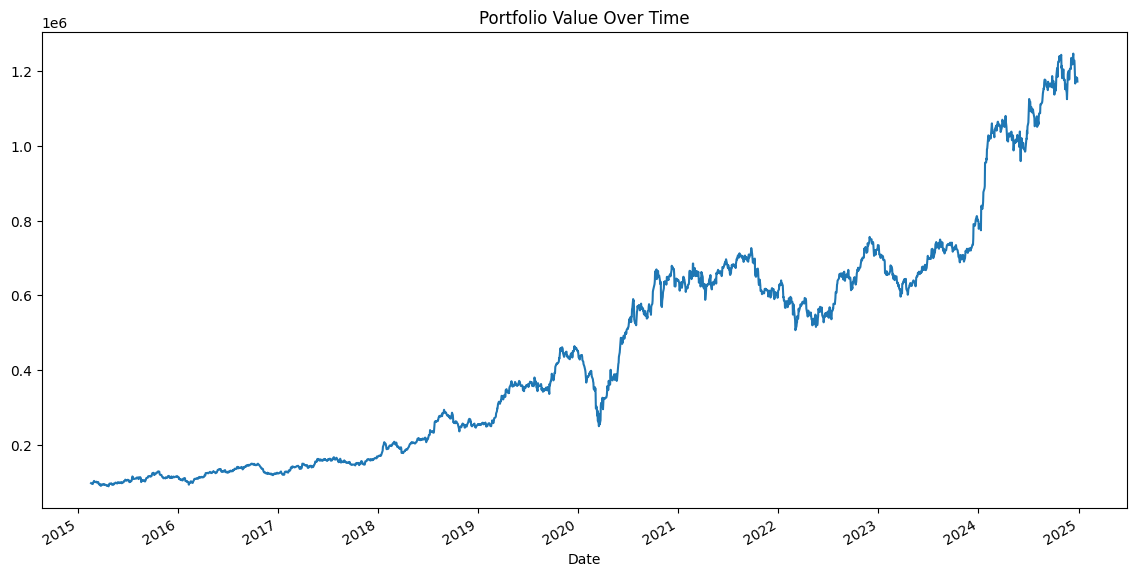

In [5]:
# We should already have 'panel_data' and 'config_path' 
# from running the previous cells.

# Import our new class
from src.backtester import Backtester

# Create an instance of the class (this will also load the saved model)
backtester = Backtester(config_path=config_path)

# Run the backtest on our panel data
backtest_results = backtester.run_backtest(panel_data)

# --- Verify the result ---
if backtest_results is not None:
    print("\n--- Backtest Results ---")
    print(f"Initial Portfolio Value: ₹{backtester.initial_capital:,.2f}")
    print(f"Final Portfolio Value:   ₹{backtest_results['Portfolio_Value'].iloc[-1]:,.2f}")
    
    # Simple plot to visualize the performance
    backtest_results['Portfolio_Value'].plot(figsize=(14, 7), title='Portfolio Value Over Time')